In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

print('\n train shape =', x_train.shape, ', train label shape =', t_train.shape)
print(' test shape =', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label =', t_train)
print('\n test label =', t_test)


 train shape = (60000, 28, 28) , train label shape = (60000,)
 test shape = (10000, 28, 28) , test label shape = (10000,)

 train label = [5 0 4 ... 5 6 8]

 test label = [7 2 1 ... 4 5 6]


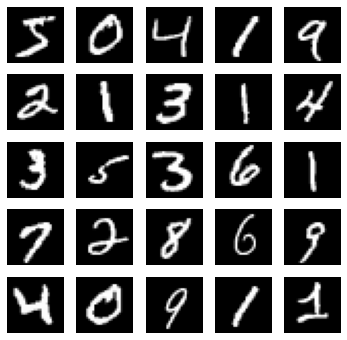

In [5]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6,6))

for index in range(25):

  plt.subplot(5, 5, index + 1)     # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')

plt.show()

In [6]:
# 학습, 테스트 데이터 정규화

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 데이터 원핫 인코딩

t_train = tf.keras.utils.to_categorical(t_train, num_classes=10)
t_test = tf.keras.utils.to_categorical(t_test, num_classes=10)

MNIST 정답 데이터는 0~9까지 10개 중 하나이므로 num_classes = 10으로 지정하여 10개의 리스트 만들어서 원핫인코딩 수행

In [8]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))     # 28x28 이미지를 784의 1차원 벡터로 변환

model.add(tf.keras.layers.Dense(100,activation='relu'))    # 은닉층 노드수는 하이퍼 파라미터이므로 환경 맞게 임의 설정

model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])     # 정답을 원핫 인코딩 방식으로 표현했기에 loss = 'categorical_crossentropy'
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3)

Epoch 1/30
1313/1313 [==============================] - 4s 2ms/step - loss: 0.5271 - accuracy: 0.8491 - val_loss: 0.1905 - val_accuracy: 0.9464
Epoch 2/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1623 - accuracy: 0.9517 - val_loss: 0.1497 - val_accuracy: 0.9567
Epoch 3/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1057 - accuracy: 0.9693 - val_loss: 0.1272 - val_accuracy: 0.9632
Epoch 4/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0803 - accuracy: 0.9750 - val_loss: 0.1130 - val_accuracy: 0.9663
Epoch 5/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0590 - accuracy: 0.9829 - val_loss: 0.1077 - val_accuracy: 0.9682
Epoch 6/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0470 - accuracy: 0.9860 - val_loss: 0.1047 - val_accuracy: 0.9694
Epoch 7/30
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 0.1037 - val_accuracy:

In [12]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9770


[0.1310662180185318, 0.9769999980926514]

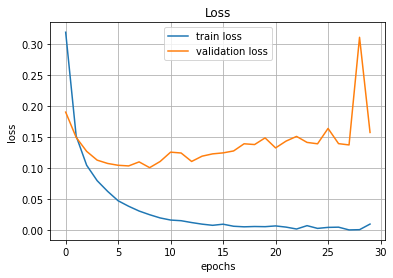

In [13]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

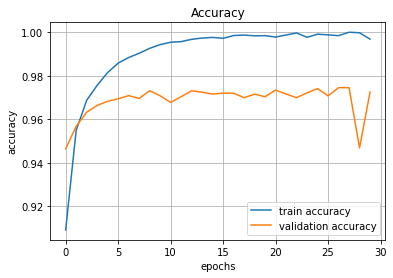

In [14]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

accuracy 96%부터 overfitting 발생

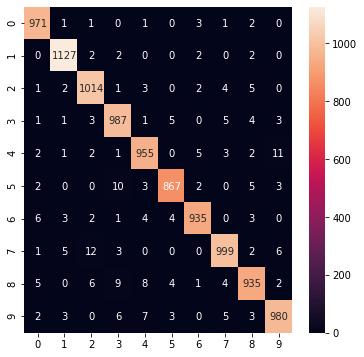

In [17]:
# 혼동행렬 (confusion matrix)
# 어떤 데이터 잘 맞추고 못 맞추는지

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6,6))

predicted_value = model.predict(x_test)     # 예측값

# 정답과 예측값 비교
cm = confusion_matrix(np.argmax(t_test, axis=-1), np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [19]:
print(cm)
print('\n')

for i in range(10):
  print(('label = %d\t(%d/%d)\taccuracy =%.3f') %
        (i, np.max(cm[i]), np.sum(cm[i]), np.max(cm[i])/np.sum(cm[i]) ))

[[ 971    1    1    0    1    0    3    1    2    0]
 [   0 1127    2    2    0    0    2    0    2    0]
 [   1    2 1014    1    3    0    2    4    5    0]
 [   1    1    3  987    1    5    0    5    4    3]
 [   2    1    2    1  955    0    5    3    2   11]
 [   2    0    0   10    3  867    2    0    5    3]
 [   6    3    2    1    4    4  935    0    3    0]
 [   1    5   12    3    0    0    0  999    2    6]
 [   5    0    6    9    8    4    1    4  935    2]
 [   2    3    0    6    7    3    0    5    3  980]]


label = 0	(971/980)	accuracy =0.991
label = 1	(1127/1135)	accuracy =0.993
label = 2	(1014/1032)	accuracy =0.983
label = 3	(987/1010)	accuracy =0.977
label = 4	(955/982)	accuracy =0.973
label = 5	(867/892)	accuracy =0.972
label = 6	(935/958)	accuracy =0.976
label = 7	(999/1028)	accuracy =0.972
label = 8	(935/974)	accuracy =0.960
label = 9	(980/1009)	accuracy =0.971
